In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("aug_train.csv")

In [5]:
df.head(5)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [9]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [19]:
# for i in 
df.select_dtypes(include="object").columns
    # df[i].fillna(df[i].mode()[0])

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [29]:
for i in df.select_dtypes(include="object").columns:
    df[i].fillna(df[i].mode()[0])


In [25]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [35]:
df["enrollee_id"].fillna(df["enrollee_id"].mode()[0])

0         8949
1        29725
2        11561
3        33241
4          666
         ...  
19153     7386
19154    31398
19155    24576
19156     5756
19157    23834
Name: enrollee_id, Length: 19158, dtype: int64

In [37]:
df["training_hours"].fillna(df["training_hours"].mode()[0])

0         36
1         47
2         83
3         52
4          8
        ... 
19153     42
19154     52
19155     44
19156     97
19157    127
Name: training_hours, Length: 19158, dtype: int64

In [53]:
q1=df["training_hours"].quantile(0.25)

In [55]:
q3=df["training_hours"].quantile(0.75)

In [57]:
q1,q3

(23.0, 88.0)

In [61]:
IQR = q3 - q1

In [63]:
IQR

65.0

In [67]:
min_r=q1-(1.5*IQR)
max_r=q3+(1.5*IQR)

In [69]:
min_r,max_r

(-74.5, 185.5)

In [71]:
new_d=df[df["training_hours"]<=max_r]

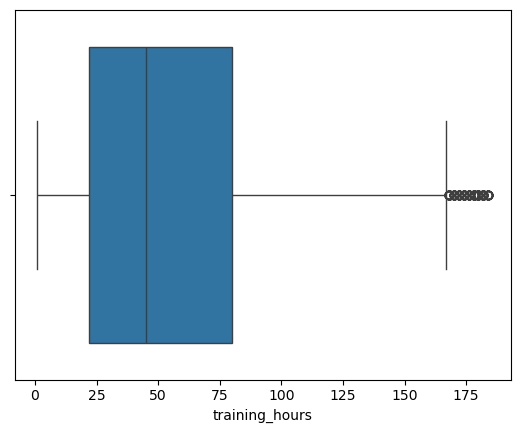

In [73]:
sns.boxplot(x="training_hours",data=new_d)
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler

In [79]:
sa =  StandardScaler()

In [89]:
sa.fit(df[["training_hours"]])

StandardScaler()

In [93]:
arr = sa.transform(df[["training_hours"]])

In [95]:
arr

array([[-0.4889846 ],
       [-0.30582494],
       [ 0.29360665],
       ...,
       [-0.35577758],
       [ 0.52671894],
       [ 1.02624527]])

In [99]:
df["training_hours_ss"]=pd.DataFrame(arr,columns=["traioning_hours"])

In [101]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,training_hours_ss
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0,-0.488985
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,-0.305825
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0,0.293607
